## 질병과 날씨와의 관계
### 1. 데이터 로딩

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pymysql
import pandas as pd

conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT *
        FROM Diseases
        WHERE 1 = 1
        -- AND DATE BETWEEN '2017-11-01' AND '2020-10-31'
        AND DATE BETWEEN '2019-01-01' AND '2019-12-31'
    '''
    cur.execute(sql)
    result_Diseases = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_Diseases))

마리아에서 불러온 행 수 : 2555


In [6]:
conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT *
        FROM ASOS_Weather_D
        WHERE 1 = 1
        -- AND DATE BETWEEN '2017-11-01' AND '2020-10-31'
        AND DATE BETWEEN '2019-01-01' AND '2019-12-31'
    '''
    cur.execute(sql)
    result_weather = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_weather))

마리아에서 불러온 행 수 : 6055


In [7]:
citypop = pd.read_csv('data/시_인구및인구밀도.csv', header=0)

citypop['Year'] = pd.to_datetime(citypop['dt']).dt.year
citypop.head()


,city,dt,pop,denpop,Year
0,서울특별시,2017-01-01,9766,16136,2017
1,부산광역시,2017-01-01,3424,4447,2017
2,대구광역시,2017-01-01,2458,2782,2017
3,인천광역시,2017-01-01,2924,2750,2017
4,광주광역시,2017-01-01,1495,2984,2017


In [8]:
# 기간 : 20191101 ~ 20201031
dtdiseases = pd.DataFrame(result_Diseases)
dtweather = pd.DataFrame(result_weather)
dtdiseases.rename(columns = {'Date' : 'dt'}, inplace = True)
dtweather.rename(columns = {'date' : 'dt'}, inplace = True)
display(dtdiseases.head(2))
display(dtweather.head(2))
display(dtdiseases.isnull().sum())
display(dtweather.isnull().sum())

,dt,Diseases,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Gyeonggi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju,Sejong
0,2019-01-01,A형간염,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-01,C형간염,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
0,강원도,2019-01-01,-5.4,-16.5,3.5,0.0,9.3,1.9,-15.9,48.6,1.8,1004.3,1031.8,6.6
1,강원도,2019-01-02,-5.6,-16.6,6.3,0.0,6.2,1.5,-17.7,44.6,1.6,1005.3,1032.9,8.2


dt           0
Diseases     0
Seoul        0
Busan        0
Daegu        0
Incheon      0
Gwangju      0
Daejeon      0
Ulsan        0
Gyeonggi     0
Gangwon      0
Chungbuk     0
Chungnam     0
Jeonbuk      0
Jeonnam      0
Gyeongbuk    0
Gyeongnam    0
Jeju         0
Sejong       0
dtype: int64

city                     0
dt                       0
temp_avg                 0
temp_min                 0
temp_max                 0
amount_of_rain           0
wind_vel_max             0
wind_vel_avg             0
dewpoint_avg             0
r_humidity               0
vapor_pressure_avg       0
station_pressure_avg     0
sealevel_pressure_avg    0
daylight_hour            0
dtype: int64

In [9]:
getCity = dtweather.groupby('city').sum().reset_index()
getCity.city.tolist()

dtdiseases.columns = [ 'dt', '질병명', '서울특별시',  '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '경기도', \
                       '강원도',  '충청북도',  '충청남도',  '전라북도', '전라남도', '경상북도', '경상남도', '제주도', '세종특별자치시']

display(dtdiseases.head(7))


,dt,질병명,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도,세종특별자치시
0,2019-01-01,A형간염,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-01-01,C형간염,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-01-01,성홍열,3,0,0,0,1,2,0,2,0,0,1,0,1,0,0,0,0
3,2019-01-01,수두,13,6,8,4,2,2,3,46,1,1,6,5,13,7,22,10,6
4,2019-01-01,유행성이하선염(볼거리),0,1,0,0,0,0,3,5,0,3,0,3,0,0,1,0,0
5,2019-01-01,쯔쯔가무시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2019-01-01,카바페넴내성장내세균속균종(CRE)감염증,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
display(dtdiseases.columns.to_list()[2:])
df = pd.DataFrame()
for ct in dtdiseases.columns.to_list()[2:] :
    print(ct)
    xdiseases = dtdiseases.pivot(index=['dt'], columns='질병명', values=ct).reset_index()
    xdiseases['city']  = ct
    df = df.append(xdiseases, ignore_index=True)
xydiseases = df

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주도',
 '세종특별자치시']

서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주도
세종특별자치시


In [11]:
display(xydiseases.head(2))
display(xydiseases.where(xydiseases.city == '서울특별시').isnull().sum())
# xydiseases.to_csv('./data/tmp.csv')

질병명,dt,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,city
0,2019-01-01,0,0,3,13,0,0,0,서울특별시
1,2019-01-02,4,6,8,88,5,1,19,서울특별시


질병명
dt                       5840
A형간염                     5840
C형간염                     5840
성홍열                      5840
수두                       5840
유행성이하선염(볼거리)             5840
쯔쯔가무시                    5840
카바페넴내성장내세균속균종(CRE)감염증    5840
city                     5840
dtype: int64

In [12]:
# display(xydiseases.groupby('city').count())
# display(dtweather.groupby('city').count())
# display(dtweather.where(dtweather['city'] =='세종특별자치시').groupby('dt').count())

In [13]:
weatherDis = pd.merge(dtweather, xydiseases, left_on=["dt", "city"], right_on=["dt", "city"], how="inner")
# weatherDis.iloc[:, [13,14,15,16,17,18,19]] = weatherDis.iloc[:, [13,14,15,16,17,18,19]].astype('float')
weatherDis['Year'] = pd.to_datetime(weatherDis['dt']).dt.year
display(weatherDis.info())
display(weatherDis.isnull().sum())
display(weatherDis.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6055 entries, 0 to 6054
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   6055 non-null   object 
 1   dt                     6055 non-null   object 
 2   temp_avg               6055 non-null   float64
 3   temp_min               6055 non-null   float64
 4   temp_max               6055 non-null   float64
 5   amount_of_rain         6055 non-null   float64
 6   wind_vel_max           6055 non-null   float64
 7   wind_vel_avg           6055 non-null   float64
 8   dewpoint_avg           6055 non-null   float64
 9   r_humidity             6055 non-null   float64
 10  vapor_pressure_avg     6055 non-null   float64
 11  station_pressure_avg   6055 non-null   float64
 12  sealevel_pressure_avg  6055 non-null   float64
 13  daylight_hour          6055 non-null   float64
 14  A형간염                   6055 non-null   int64  
 15  C형간염

None

city                     0
dt                       0
temp_avg                 0
temp_min                 0
temp_max                 0
amount_of_rain           0
wind_vel_max             0
wind_vel_avg             0
dewpoint_avg             0
r_humidity               0
vapor_pressure_avg       0
station_pressure_avg     0
sealevel_pressure_avg    0
daylight_hour            0
A형간염                     0
C형간염                     0
성홍열                      0
수두                       0
유행성이하선염(볼거리)             0
쯔쯔가무시                    0
카바페넴내성장내세균속균종(CRE)감염증    0
Year                     0
dtype: int64

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,sealevel_pressure_avg,daylight_hour,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,Year
0,강원도,2019-01-01,-5.4,-16.5,3.5,0.0,9.3,1.9,-15.9,48.6,...,1031.8,6.6,0,0,0,1,0,0,0,2019
1,강원도,2019-01-02,-5.6,-16.6,6.3,0.0,6.2,1.5,-17.7,44.6,...,1032.9,8.2,4,0,0,13,2,0,3,2019


In [14]:
weatherDis = pd.merge(weatherDis, citypop, left_on=["Year", "city"], right_on=["Year", "city"], how="inner")
display(weatherDis.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6055 entries, 0 to 6054
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   6055 non-null   object 
 1   dt_x                   6055 non-null   object 
 2   temp_avg               6055 non-null   float64
 3   temp_min               6055 non-null   float64
 4   temp_max               6055 non-null   float64
 5   amount_of_rain         6055 non-null   float64
 6   wind_vel_max           6055 non-null   float64
 7   wind_vel_avg           6055 non-null   float64
 8   dewpoint_avg           6055 non-null   float64
 9   r_humidity             6055 non-null   float64
 10  vapor_pressure_avg     6055 non-null   float64
 11  station_pressure_avg   6055 non-null   float64
 12  sealevel_pressure_avg  6055 non-null   float64
 13  daylight_hour          6055 non-null   float64
 14  A형간염                   6055 non-null   int64  
 15  C형간염

None

In [15]:
# display(weatherDis.columns.to_list())
disList = ['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증']
for d in disList :
    weatherDis['pop_' + d]  = weatherDis[d] / weatherDis['pop']

weatherDis.drop(['pop_A형간염', 'pop_C형간염', 'pop_성홍열', 'pop_수두', 'pop_유행성이하선염(볼거리)', 'pop_쯔쯔가무시', 'pop_카바페넴내성장내세균속균종(CRE)감염증'], axis=1, inplace=True)    

display(weatherDis)

,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,Year,dt_y,pop,denpop
0,강원도,2019-01-01,-5.4,-16.5,3.5,0.0,9.3,1.9,-15.9,48.6,...,0,0,1,0,0,0,2019,2019-01-01,1517,90
1,강원도,2019-01-02,-5.6,-16.6,6.3,0.0,6.2,1.5,-17.7,44.6,...,0,0,13,2,0,3,2019,2019-01-01,1517,90
2,강원도,2019-01-03,-4.8,-16.8,6.8,0.0,6.0,1.2,-17.2,43.7,...,0,0,8,1,0,3,2019,2019-01-01,1517,90
3,강원도,2019-01-04,-2.0,-14.1,8.9,0.0,9.1,1.7,-13.1,47.8,...,3,1,3,0,0,3,2019,2019-01-01,1517,90
4,강원도,2019-01-05,-2.5,-13.5,5.1,0.0,6.5,1.5,-12.6,50.6,...,1,0,7,0,0,0,2019,2019-01-01,1517,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6050,충청북도,2019-12-27,-2.4,-11.3,4.2,0.0,7.3,1.8,-8.8,63.4,...,0,0,11,2,0,0,2019,2019-01-01,1626,219
6051,충청북도,2019-12-28,-2.5,-11.7,7.3,0.0,1.9,0.5,-8.0,68.9,...,1,0,7,1,0,0,2019,2019-01-01,1626,219
6052,충청북도,2019-12-29,0.2,-8.0,5.2,7.2,4.0,0.7,-3.5,77.9,...,0,0,4,2,0,0,2019,2019-01-01,1626,219
6053,충청북도,2019-12-30,2.8,-3.9,7.4,1.5,8.7,1.6,0.5,86.0,...,3,1,23,3,2,1,2019,2019-01-01,1626,219


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# 컬럼별 정규화 함수
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# 회귀실행 및 결정계수 저장
def runLinearRegression(vCity, shiftln, groupR, mergedrv, rCorr): 
    result = pd.DataFrame()
    # display(mergedrv)
    for rv in rCorr.index.tolist():

        X=mergedrv[rCorr.columns.tolist()].reset_index().drop('datetime', axis=1)
        y=mergedrv[rv].reset_index().drop('datetime', axis=1)
        # display(X)
        # display(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

        lr = LinearRegression()  
        lr.fit(X_train, y_train)

        r_square = lr.score(X_test, y_test)

        result = result.append({'City' : vCity , 'Response' : rv,'shiftrow' : shiftln ,'grouprow' : groupR , 'R_square' : r_square, \
                                'Xa' : lr.coef_.tolist()[0], 'b' : lr.intercept_, 'dvList' : rCorr.columns.tolist()} , ignore_index=True)
        # print(result)
    return result


# 함수
def runCorrLR(df, cityLst, dependentVslst, responseVsLst, shiftGap, groupGap):
    result = pd.DataFrame()
    # 1. df에서 도시별로 실행
    for vCity in cityLst:
        
        tmpdf = df[df['city'] == vCity]
        # 종속변수 df (표준화실행)
#         dvdf = normalize(tmpdf[dependentVslst])
        dvdf = tmpdf[dependentVslst]  
        # 반응변수 df (표준화실행)
#         rvdf = normalize(tmpdf[responseVsLst])
        rvdf = tmpdf[responseVsLst]      
        # 2. shift실행
        for shiftln in range(0, shiftGap):
            dvdf.sort_index()
            
            # 3. 컬럼별로 shift
            for d in dependentVslst :
                dvdf['sft_' + d]  = dvdf[d].shift(- shiftln)

            dvdf.drop(dependentVslst, axis=1)
            # shift로 생긴 na제거
            dvdf = dvdf.dropna(how='any',axis=0) 
            
            
            # 4. 범위로 group 묶기
            for groupln in range(1, groupGap + 1): 
                groupR = str(groupln) + 'D'
                gdvdf = dvdf[dependentVslst].resample(groupR).sum()
                grvdf = rvdf[responseVsLst].resample(groupR).mean()


                mergedrv = pd.merge(gdvdf, grvdf, left_index=True, right_index=True, how='left')
                # print(vCity, shiftln, groupR)
                rCorr = mergedrv.corr().loc[responseVsLst][dependentVslst]
                # display(mergedrv.corr().loc[responseVsLst][dependentVslst])
                rResult = runLinearRegression(vCity, shiftln, groupR, mergedrv, rCorr)
                result = result.append(rResult)
                # print(rCorr.index)
    return(result)


In [ ]:
def runCorrLR(df, cityLst, dependentVslst, responseVsLst, shiftGap, groupGap):
    result = pd.DataFrame()
    # 1. df에서 도시별로 실행
    for vCity in cityLst:
        
        tmpdf = df[df['city'] == vCity]
        # 종속변수 df (표준화실행)
#         dvdf = normalize(tmpdf[dependentVslst])
        dvdf = tmpdf[dependentVslst]  
        # 반응변수 df (표준화실행)
#         rvdf = normalize(tmpdf[responseVsLst])
        rvdf = tmpdf[responseVsLst]      
        # 2. shift실행
        for shiftln in range(0, shiftGap):
            dvdf.sort_index()
            
            # 3. 컬럼별로 shift
            for d in dependentVslst :
                dvdf['sft_' + d]  = dvdf[d].shift(- shiftln)

            dvdf.drop(dependentVslst, axis=1)
            # shift로 생긴 na제거
            dvdf = dvdf.dropna(how='any',axis=0) 
            
            
            # 4. 범위로 group 묶기
            for groupln in range(1, groupGap + 1): 
                groupR = str(groupln) + 'D'
                gdvdf = dvdf[dependentVslst].resample(groupR).sum()
                grvdf = rvdf[responseVsLst].resample(groupR).mean()


                mergedrv = pd.merge(gdvdf, grvdf, left_index=True, right_index=True, how='left')
                # print(vCity, shiftln, groupR)
                rCorr = mergedrv.corr().loc[responseVsLst][dependentVslst]
                # display(mergedrv.corr().loc[responseVsLst][dependentVslst])
                rResult = runLinearRegression(vCity, shiftln, groupR, mergedrv, rCorr)
                result = result.append(rResult)
                # print(rCorr.index)
    return(result)

In [17]:
# testdf = weatherDis[weatherDis['city'].isin(['서울특별시', '강원도'])]
testdf = weatherDis
# cityLst = ['서울특별시', '강원도']
cityLst = [ '서울특별시',  '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '경기도', \
                       '강원도',  '충청북도',  '충청남도',  '전라북도', '전라남도', '경상북도', '경상남도', '제주도', '세종특별자치시']
dependentVslst = ['temp_avg', 'amount_of_rain', 'r_humidity']
responseVsLst = ['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', \
                   '카바페넴내성장내세균속균종(CRE)감염증']
shiftGapD = 7
groupGapD = 7


testdf['datetime'] = testdf['dt_x'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
testdf.set_index(testdf['datetime'], inplace=True)
testdf = testdf.drop('datetime', 1)

saveList = runCorrLR(testdf, cityLst, dependentVslst, responseVsLst, shiftGapD, groupGapD)

# print(saveList)
saveList.to_csv("./data/diseasesRsqareList.csv")
# ㅋㅋ 17city * 7shift * 7group * 7반응 = 5931

In [878]:
testdf.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='datetime', length=6055, freq=None)

In [898]:
testdf.columns

Index(['city', 'dt_x', 'temp_avg', 'temp_min', 'temp_max', 'amount_of_rain',
       'wind_vel_max', 'wind_vel_avg', 'dewpoint_avg', 'r_humidity',
       'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg',
       'daylight_hour', 'A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시',
       '카바페넴내성장내세균속균종(CRE)감염증', 'Year', 'dt_y', 'pop', 'denpop'],
      dtype='object')

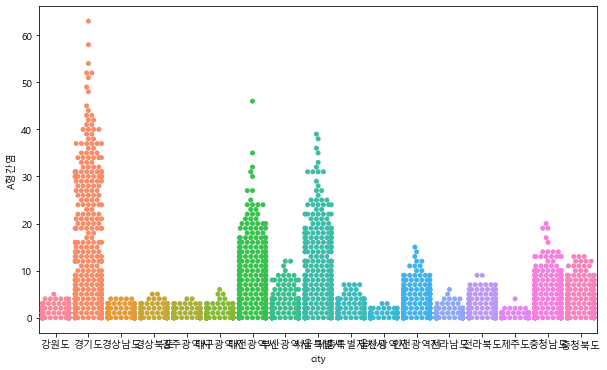

In [899]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="city",           #x축 변수
              y="A형간염",        #y축 변수
              data=weatherDis)
plt.show()

In [900]:
tmp = weatherDis[weatherDis['city'] == '경기도']
tmp_s = weatherDis[weatherDis['city'] == '경기도']
# corrweatherDis = tmp.corr()
# corrweatherDis.to_csv("./data/corrSheet_weatherDis_서울특별시.csv")


In [901]:
from sklearn import preprocessing
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [902]:
tmp_ss = tmp_s[['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증']]
tmp_s = tmp_s.drop(['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증'], axis=1)
tmp_ss = normalize(tmp_ss)
display(tmp_ss.head(2))
display(tmp_s.head(2))
tmp_s = pd.merge(tmp_s, tmp_ss, left_index=True, right_index=True, how='left')

display(tmp_s.head(2))

,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증
datetime,,,,,,,
2019-01-01,0.000000,0.000000,0.105263,0.255952,0.111111,0.0,0.000000
2019-01-02,0.079365,0.823529,0.421053,0.928571,0.361111,0.0,0.290323


,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour,Year,dt_y,pop,denpop,datetime
datetime,,,,,,,,,,,,,,,,,,,
2019-01-01,경기도,2019-01-01,-6.4,-15.5,1.2,0.0,5.2,1.5,-13.7,58.1,2.2,1026.0,1034.1,6.5,2019,2019-01-01,13238,1299,2019-01-01
2019-01-02,경기도,2019-01-02,-6.5,-16.1,2.2,0.0,3.7,0.9,-15.3,54.2,1.9,1026.9,1035.0,8.7,2019,2019-01-01,13238,1299,2019-01-02


,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,pop,denpop,datetime,A형간염,C형간염,성홍열,수두,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01,경기도,2019-01-01,-6.4,-15.5,1.2,0.0,5.2,1.5,-13.7,58.1,...,13238,1299,2019-01-01,0.000000,0.000000,0.105263,0.255952,0.111111,0.0,0.000000
2019-01-02,경기도,2019-01-02,-6.5,-16.1,2.2,0.0,3.7,0.9,-15.3,54.2,...,13238,1299,2019-01-02,0.079365,0.823529,0.421053,0.928571,0.361111,0.0,0.290323


In [903]:

# corrweatherDis = weatherDis.corr()
# corrweatherDis.to_csv("./data/corrSheet_weatherDis.csv")
disList = ['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증']


tmp_s.sort_values(by=['dt_x'], axis=0, inplace=True)


for d in disList :
    tmp_s['sft_' + d]  = tmp_s[d].shift(-4)

tmp_s.drop(['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', '카바페넴내성장내세균속균종(CRE)감염증'], axis=1)    

tmp_s = tmp_s.dropna(how='any',axis=0) 

display(tmp_s.head(2))
display(tmp_s.tail(2))


,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01,경기도,2019-01-01,-6.4,-15.5,1.2,0.0,5.2,1.5,-13.7,58.1,...,0.111111,0.0,0.000000,0.015873,0.058824,0.421053,0.553571,0.194444,0.0,0.032258
2019-01-02,경기도,2019-01-02,-6.5,-16.1,2.2,0.0,3.7,0.9,-15.3,54.2,...,0.361111,0.0,0.290323,0.000000,0.000000,0.000000,0.339286,0.083333,0.0,0.000000


,city,dt_x,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,유행성이하선염(볼거리),쯔쯔가무시,카바페넴내성장내세균속균종(CRE)감염증,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-26,경기도,2019-12-26,1.2,-3.3,4.4,1.1,5.4,1.6,-2.2,78.6,...,0.361111,0.071429,0.387097,0.079365,0.176471,0.526316,1.000000,0.388889,0.000000,0.290323
2019-12-27,경기도,2019-12-27,-2.2,-8.7,4.1,0.0,4.5,1.3,-8.6,63.9,...,0.277778,0.000000,0.258065,0.031746,0.294118,0.052632,0.553571,0.194444,0.071429,0.451613


In [904]:
# tmp_s.columns.to_list()


In [905]:
# tem = weatherDis
tmp_s['datetime'] = tmp_s['dt_x'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
tmp_s = tmp_s[['datetime', 'daylight_hour', 'temp_avg', 'r_humidity', 'amount_of_rain', 'sft_A형간염','sft_C형간염', 'sft_성홍열', 'sft_수두', 'sft_유행성이하선염(볼거리)', 'sft_쯔쯔가무시', 'sft_카바페넴내성장내세균속균종(CRE)감염증']]
tmp_s.set_index(tmp_s['datetime'], inplace=True)
tmp_s = tmp_s.drop('datetime', 1)
tmp_s

,daylight_hour,temp_avg,r_humidity,amount_of_rain,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
datetime,,,,,,,,,,,
2019-01-01,6.5,-6.4,58.1,0.0,0.015873,0.058824,0.421053,0.553571,0.194444,0.000000,0.032258
2019-01-02,8.7,-6.5,54.2,0.0,0.000000,0.000000,0.000000,0.339286,0.083333,0.000000,0.000000
2019-01-03,8.8,-5.7,52.7,0.0,0.111111,0.235294,0.421053,0.869048,0.361111,0.000000,0.225806
2019-01-04,5.6,-3.6,64.7,0.0,0.063492,0.352941,0.421053,0.446429,0.222222,0.000000,0.290323
2019-01-05,8.6,-3.5,46.8,0.0,0.111111,0.764706,0.105263,0.476190,0.083333,0.000000,0.354839
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.9,2.0,90.6,2.4,0.095238,0.411765,0.315789,0.672619,0.277778,0.000000,0.258065
2019-12-24,4.5,-1.5,92.2,0.0,0.015873,0.000000,0.157895,0.214286,0.083333,0.000000,0.096774
2019-12-25,3.8,-0.4,85.4,0.0,0.015873,0.058824,0.052632,0.160714,0.083333,0.000000,0.000000


In [906]:
from sklearn import preprocessing
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

a = [[100, 200], [200, 400], [150, 250]]
print(pd.DataFrame(a))

normalize(pd.DataFrame(a))

     0    1
0  100  200
1  200  400
2  150  250


,0,1
0,0.0,0.00
1,1.0,1.00
2,0.5,0.25


In [907]:
import pandas as pd
import numpy as np

weekly_df1 = tmp_s[[ 'sft_A형간염','sft_C형간염', 'sft_성홍열', 'sft_수두', 'sft_유행성이하선염(볼거리)', 'sft_쯔쯔가무시', 'sft_카바페넴내성장내세균속균종(CRE)감염증']]. \
                resample('7D').sum()
weekly_df2 = tmp_s[['daylight_hour', 'temp_avg',  'r_humidity', 'amount_of_rain']].resample('7D').mean()


weekly_tr = pd.merge(weekly_df1, weekly_df2, left_on=['datetime'], right_on=['datetime'], how="inner")

display(weekly_tr.count())

sft_A형간염                     52
sft_C형간염                     52
sft_성홍열                      52
sft_수두                       52
sft_유행성이하선염(볼거리)             52
sft_쯔쯔가무시                    52
sft_카바페넴내성장내세균속균종(CRE)감염증    52
daylight_hour                52
temp_avg                     52
r_humidity                   52
amount_of_rain               52
dtype: int64

In [908]:
import pandas as pd
import numpy as np

weekly_df1 = tmp_s[[  'sft_A형간염','sft_C형간염', 'sft_성홍열', 'sft_수두', 'sft_유행성이하선염(볼거리)', 'sft_쯔쯔가무시', 'sft_카바페넴내성장내세균속균종(CRE)감염증']]. \
                resample('W').sum()
weekly_df2 = tmp_s[['daylight_hour', 'temp_avg',  'r_humidity', 'amount_of_rain']].resample('W').mean()


weekly_trl = pd.merge(weekly_df1, weekly_df2, left_on=['datetime'], right_on=['datetime'], how="inner")

display(weekly_trl.count())

sft_A형간염                     52
sft_C형간염                     52
sft_성홍열                      52
sft_수두                       52
sft_유행성이하선염(볼거리)             52
sft_쯔쯔가무시                    52
sft_카바페넴내성장내세균속균종(CRE)감염증    52
daylight_hour                52
temp_avg                     52
r_humidity                   52
amount_of_rain               52
dtype: int64

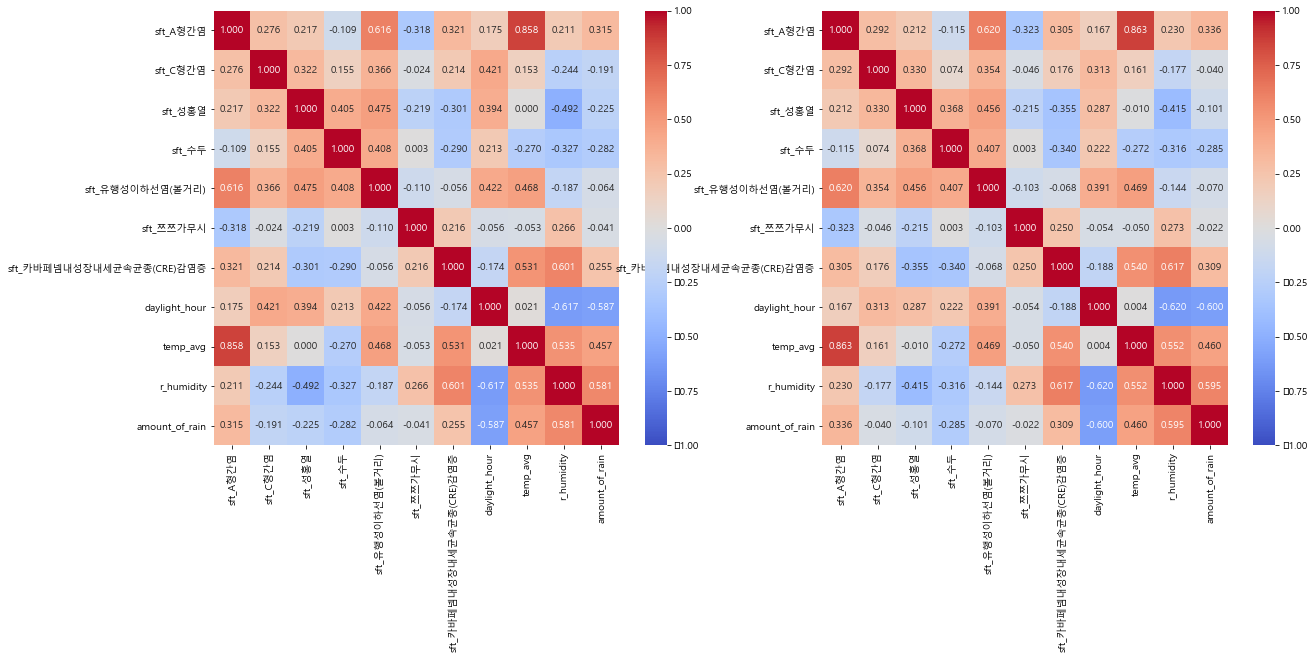

In [909]:
df_cor = weekly_tr.corr()
df_cor1 = weekly_trl.corr()

fig, axes = plt.subplots(ncols=2, figsize=(20,8))
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(df_cor,
            annot=True,
            cmap='coolwarm',
            fmt='.3f',
            vmin=-1, vmax=1,
            ax=axes[0])

sns.heatmap(df_cor1,
            annot=True,
            cmap='coolwarm',
            fmt='.3f',
            vmin=-1, vmax=1,
            ax=axes[1])
plt.show()


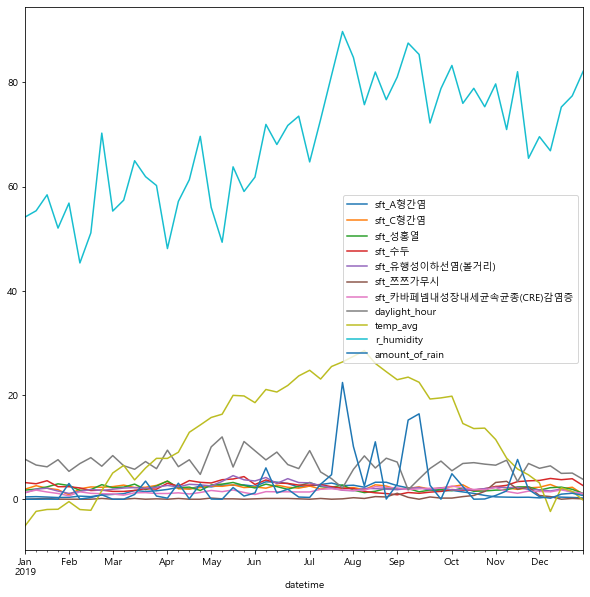

In [910]:
weekly_trl.plot()
plt.show()

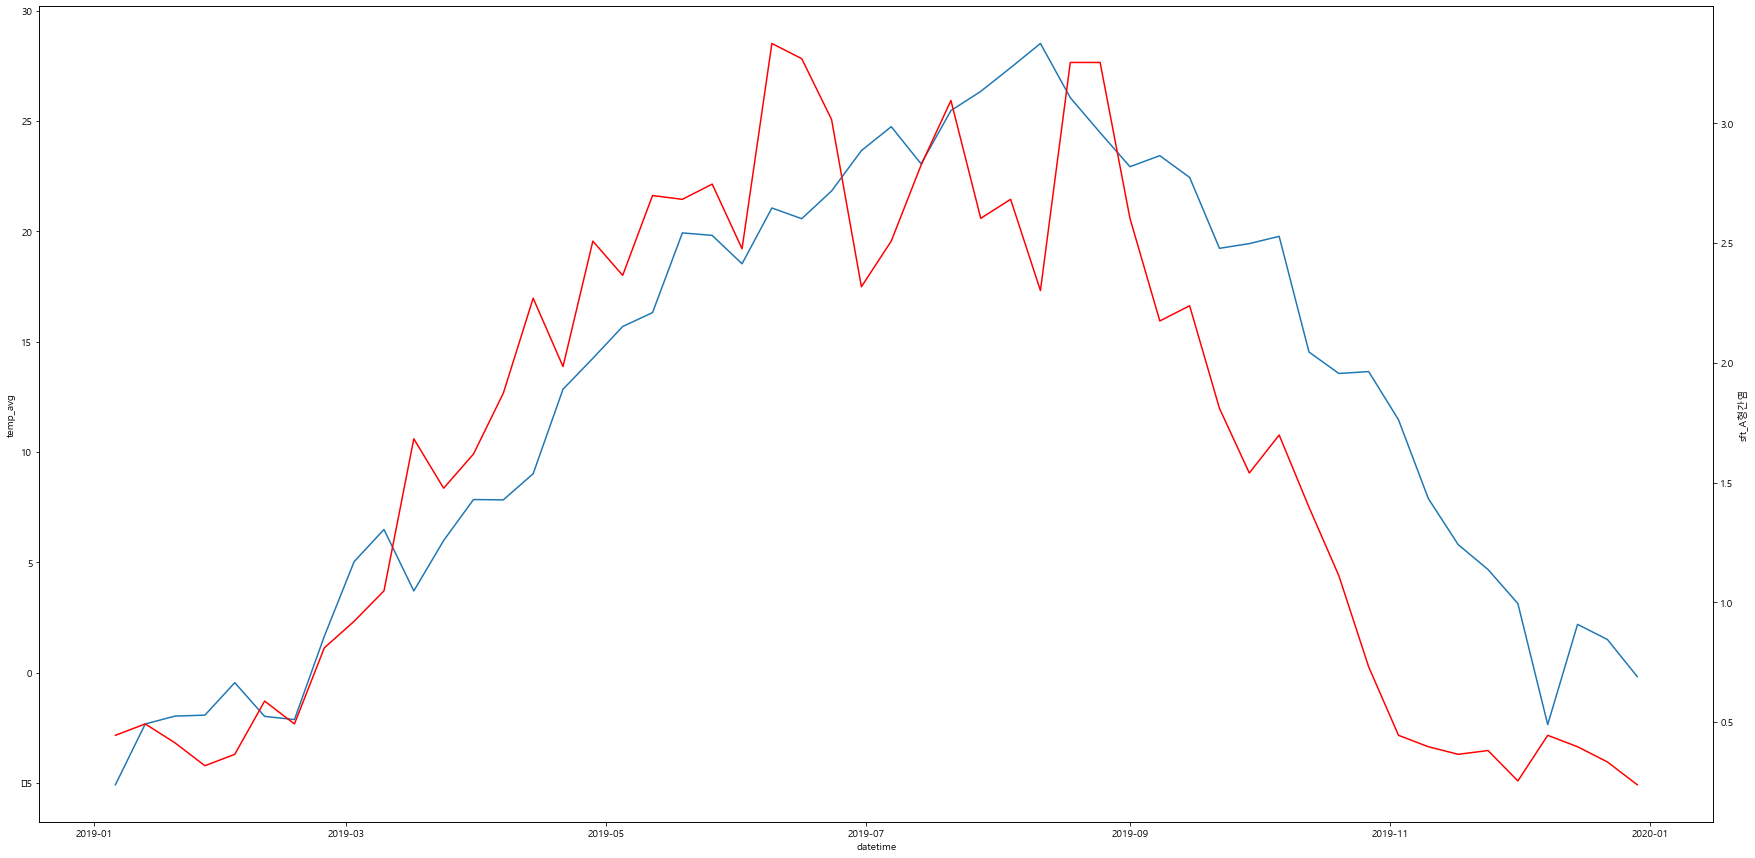

In [916]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# print(font_name)

fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(x='datetime', y='temp_avg', data=weekly_trl, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='datetime', y='sft_A형간염', data=weekly_trl, ax=ax2, color='r')
plt.show()

# - 강수량과 일조량의 영향력

In [912]:
display(tmp_s.head(2))

,daylight_hour,temp_avg,r_humidity,amount_of_rain,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
datetime,,,,,,,,,,,
2019-01-01,6.5,-6.4,58.1,0.0,0.015873,0.058824,0.421053,0.553571,0.194444,0.0,0.032258
2019-01-02,8.7,-6.5,54.2,0.0,0.000000,0.000000,0.000000,0.339286,0.083333,0.0,0.000000


<AxesSubplot:xlabel='datetime'>

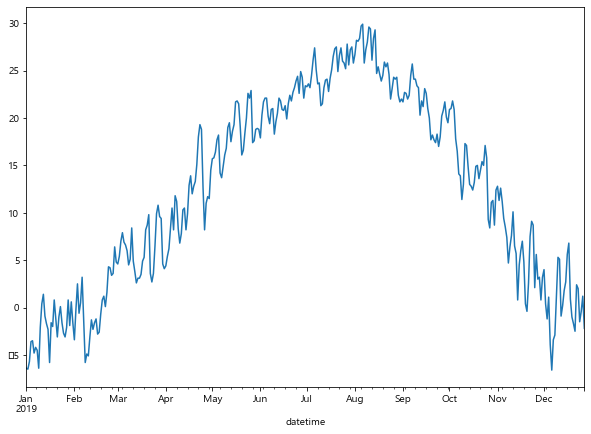

In [913]:
plt.figure(figsize=(10, 7))
tmp_s['temp_avg'].plot()

Malgun Gothic


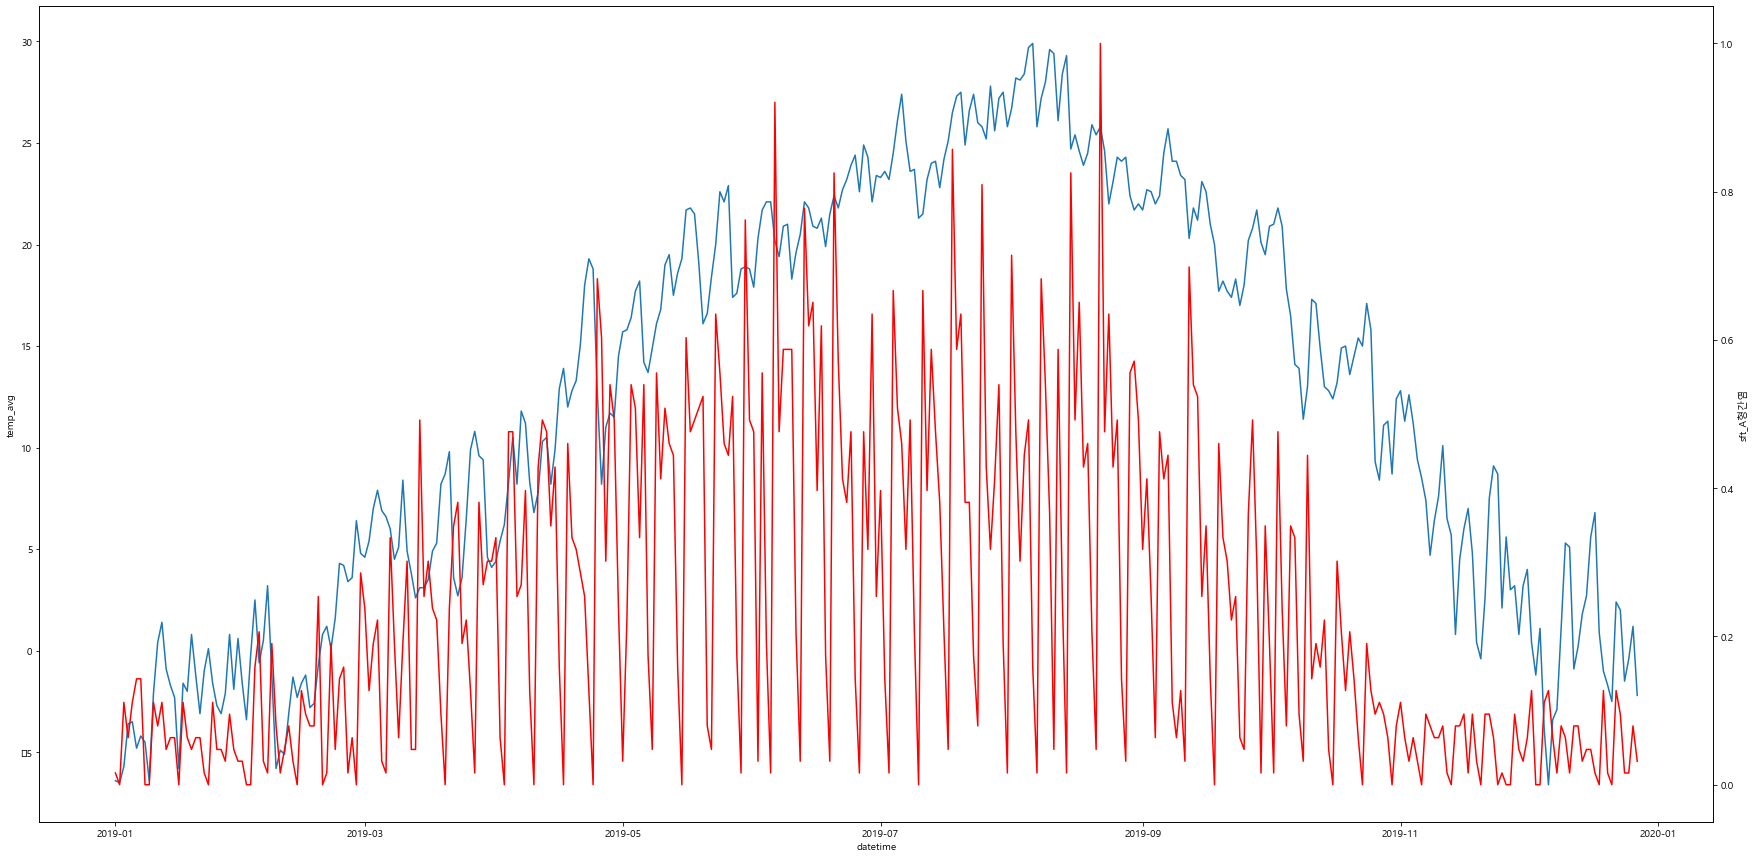

In [917]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
print(font_name)

tmp_s = tmp_s.reset_index()
fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(x='datetime', y=tmp_s['temp_avg'], data=tmp_s, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='datetime', y=tmp_s['sft_A형간염'], data=tmp_s, ax=ax2, color='r')
plt.show()
# weatherShop_allP[['dt', 'daylight_hour']].to_csv('./data/daylight_hour.csv')

In [918]:
# 강수량 bining
def get_category(amount_of_rain):
    cat = ''
    if amount_of_rain == 0: cat = 0
    elif amount_of_rain <=1: cat = 1
    elif amount_of_rain <=4: cat = 4
    elif amount_of_rain <=11: cat = 11
    else : cat = 12
    return cat

tmp_s['wf_bin'] = tmp_s['amount_of_rain'].apply(lambda x : get_category(x))

tmp_s.groupby('wf_bin').count()



,level_0,index,datetime,daylight_hour,temp_avg,r_humidity,amount_of_rain,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
wf_bin,,,,,,,,,,,,,,
0,241,241,241,241,241,241,241,241,241,241,241,241,241,241
1,38,38,38,38,38,38,38,38,38,38,38,38,38,38
4,33,33,33,33,33,33,33,33,33,33,33,33,33,33
11,21,21,21,21,21,21,21,21,21,21,21,21,21,21
12,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [924]:
# 일조량 범주화
bin_names = [x for x in range(0, 10)]

# bins
count, bin_dividers = np.histogram(tmp_s['daylight_hour'], bins=10)
print(count, bin_dividers) 


tmp_s['dl_bin'] = pd.cut(x=tmp_s['daylight_hour'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 


[45 26 25 29 26 38 62 51 36 23] [ 0.   1.3  2.6  3.9  5.2  6.5  7.8  9.1 10.4 11.7 13. ]


In [925]:
# 강수량, 일조량 범주별 평균
grouped_wf_bin = tmp_s.groupby('wf_bin')
grouped_dl_bin = tmp_s.groupby('dl_bin')

# grouped.agg('mean') 
grouped_wf_bin_mean = grouped_wf_bin.agg('mean')
grouped_dl_bin_mean = grouped_dl_bin.agg('mean')
display(grouped_wf_bin_mean)
display(grouped_dl_bin_mean)

,level_0,index,daylight_hour,temp_avg,r_humidity,amount_of_rain,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증
wf_bin,,,,,,,,,,,,,
0,166.597510,166.597510,8.219087,10.775104,63.349793,0.000000,0.213989,0.334635,0.326709,0.364552,0.323190,0.066094,0.216437
1,197.526316,197.526316,4.805263,14.463158,72.489474,0.384211,0.261069,0.263158,0.263158,0.359806,0.317251,0.030075,0.204584
4,224.969697,224.969697,4.369697,15.363636,77.709091,2.115152,0.261664,0.340463,0.291866,0.358045,0.350168,0.047619,0.242424
11,187.523810,187.523810,2.380952,14.414286,81.476190,7.038095,0.315949,0.294118,0.335840,0.399093,0.353175,0.044218,0.221198
12,212.928571,212.928571,1.446429,20.217857,88.425000,27.371429,0.304422,0.281513,0.287594,0.320791,0.309524,0.038265,0.259217


,level_0,index,daylight_hour,temp_avg,r_humidity,amount_of_rain,sft_A형간염,sft_C형간염,sft_성홍열,sft_수두,sft_유행성이하선염(볼거리),sft_쯔쯔가무시,sft_카바페넴내성장내세균속균종(CRE)감염증,wf_bin
dl_bin,,,,,,,,,,,,,,
0,207.361702,207.361702,0.419149,15.819149,85.878723,13.540426,0.298210,0.337922,0.312430,0.378673,0.343381,0.013678,0.247083,8.297872
1,185.640000,185.640000,1.884000,11.140000,75.448000,5.028000,0.195556,0.254118,0.320000,0.300000,0.256667,0.031429,0.150968,2.760000
2,157.916667,157.916667,3.150000,11.033333,71.891667,3.712500,0.176587,0.200980,0.254386,0.289435,0.268519,0.023810,0.145161,3.791667
3,207.066667,207.066667,4.506667,14.260000,77.506667,2.500000,0.248677,0.323529,0.315789,0.407738,0.364815,0.100000,0.269892,2.266667
4,219.071429,219.071429,5.992857,13.367857,74.964286,0.921429,0.287415,0.348739,0.347744,0.377338,0.319444,0.068878,0.275346,0.964286
5,198.657143,198.657143,7.208571,9.177143,68.134286,0.640000,0.151474,0.342857,0.258647,0.345238,0.287302,0.153061,0.225806,0.942857
6,171.632353,171.632353,8.591176,6.889706,61.402941,0.216176,0.153595,0.312284,0.311146,0.380515,0.287173,0.048319,0.222486,0.514706
7,158.702128,158.702128,9.657447,13.068085,61.685106,0.085106,0.239108,0.349186,0.318029,0.298632,0.331560,0.086626,0.236102,0.234043
8,151.676471,151.676471,11.135294,17.623529,58.650000,0.161765,0.341737,0.391003,0.332817,0.358193,0.357026,0.018908,0.184061,0.382353


In [926]:
grouped_wf_bin_mean = grouped_wf_bin_mean.reset_index()
grouped_wf_bin_mean['wf_bin'] = grouped_wf_bin_mean['wf_bin'].astype('int')

grouped_dl_bin_mean = grouped_dl_bin_mean.reset_index()
grouped_dl_bin_mean['dl_bin'] = grouped_dl_bin_mean['dl_bin'].astype('int')


In [927]:
# 필요 컬럼만 남김
grouped_wf_bin_mean.columns.tolist()

dropColList = ['temp_min', 'temp_max', 'amount_of_rain', 'wind_vel_max', 'wind_vel_avg', \
               'dewpoint_avg', 'r_humidity', 'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg']

f_grouped_wf_bin_mean = grouped_wf_bin_mean.drop(dropColList, axis=1)
f_grouped_dl_bin_mean = grouped_dl_bin_mean.drop(dropColList, axis=1)


display(f_grouped_wf_bin_mean)
display(f_grouped_dl_bin_mean)

KeyError: "['temp_min' 'temp_max' 'wind_vel_max' 'wind_vel_avg' 'dewpoint_avg'\n 'vapor_pressure_avg' 'station_pressure_avg' 'sealevel_pressure_avg'] not found in axis"

In [928]:
f_grouped_wf_bin_mean_corr = f_grouped_wf_bin_mean.corr()
f_grouped_dl_bin_mean_corr = f_grouped_dl_bin_mean.corr()

# f_grouped_wf_bin_mean_corr.to_csv("./data/f_grouped_wf_bin_mean_corr.csv")
# f_grouped_dl_bin_mean_corr.to_csv("./data/f_grouped_dl_bin_mean_corr.csv")

In [929]:
dropColList = ['city','temp_min', 'temp_max', 'amount_of_rain', 'wind_vel_max', 'wind_vel_avg', 'daylight_hour', \
               'dewpoint_avg', 'r_humidity', 'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg']
f_weathervsproduct = tmp_s.drop(dropColList, axis = 1)
print(f_weathervsproduct[['dl_bin', 'wf_bin']].groupby('wf_bin').count())
print(f_weathervsproduct[['dl_bin', 'wf_bin']].groupby('dl_bin').count())

KeyError: "['city' 'temp_min' 'temp_max' 'wind_vel_max' 'wind_vel_avg' 'dewpoint_avg'\n 'vapor_pressure_avg' 'station_pressure_avg' 'sealevel_pressure_avg'] not found in axis"

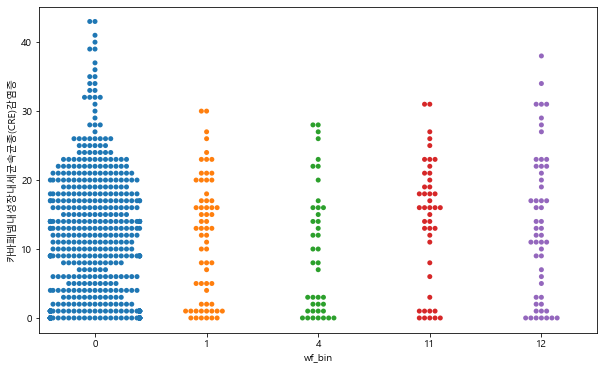

In [426]:
# 강수량에 따른 클릭율 변화
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="wf_bin",        #x축 변수
              y="카바페넴내성장내세균속균종(CRE)감염증",        #y축 변수
              data=f_weathervsproduct)      
plt.show()

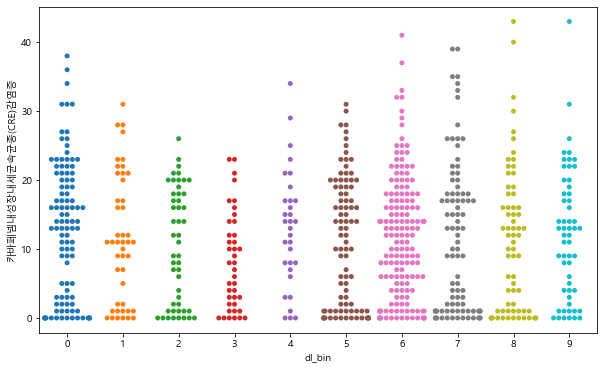

In [427]:
# 일조량에 따른 클릭율 변화
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="dl_bin",        #x축 변수
              y="카바페넴내성장내세균속균종(CRE)감염증",        #y축 변수
              data=f_weathervsproduct)      
plt.show()

In [429]:
# import numpy as np
# from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# one_hot = LabelBinarizer()
# one_hot.fit_transform(f_weathervsproduct.wf_bin)
# one_hot.classes_

dummy_wf_bin = pd.get_dummies(f_weathervsproduct.wf_bin)
# dummy_wf_bin.columns = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11']
dummy_wf_bin.columns = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11']

dummy_dl_bin = pd.get_dummies(f_weathervsproduct.dl_bin)
dummy_dl_bin.columns = ['dl'+ str(z) for z in range(0,10)]



In [430]:
f_weathervsproduct_d = pd.concat([dummy_wf_bin, dummy_dl_bin, f_weathervsproduct], axis=1)
# f_weathervsproduct_d.loc[:,['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'wf_bin']]

In [ ]:
f_weathervsproduct_d = weekly_trl.reset_index()
f_weathervsproduct_d

In [930]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xlist = ['temp_avg', 'amount_of_rain', 'r_humidity']
# xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'temp_avg']
# xlist = ['dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'temp_avg']
X=weekly_trl[xlist]
y=weekly_trl['sft_A형간염']

# A형간염	C형간염	성홍열	수두	유행성이하선염(볼거리)
# 설명 변수 데이터를 정규화(normalization)
# from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit(X).transform(X)

# (1) train, test 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
 

훈련 데이터:  (36, 3)
검증 데이터:  (16, 3)


In [931]:
# (2) 다중회귀분석 모형
lr = LinearRegression()  
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('결정계수(R-제곱): ', r_square)
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

# 회귀식의 y절편
print('상수항 b: ', lr.intercept_)

결정계수(R-제곱):  0.8340776159872612
X 변수의 계수 a:  [ 0.10701439  0.01004662 -0.03405926]
상수항 b:  2.6568866994058657


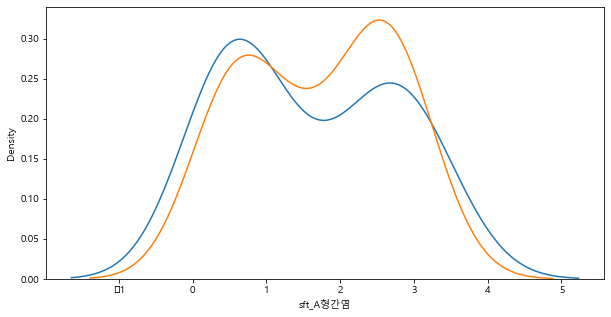

In [932]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def runLinearRegression(xlist, data): 
    df = pd.DataFrame()
    ydata = data.drop(xlist + [ 'dl_bin', 'dt_x','Year', 'dt_y'], axis=1)
    print(ydata.columns.tolist())
    for colname in ydata.columns.tolist():

        X=data[xlist]
        y=data[colname]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

        lr = LinearRegression()  
        lr.fit(X_train, y_train)

        r_square = lr.score(X_test, y_test)
#         print('[' + colname + '])
#         print('[' + colname + ']', '결정계수(R-제곱) :', r_square, '상수항 b: ', lr.intercept_)
#         print('X 변수의 계수 a: ', lr.coef_)
        df = df.append({'productName' : colname , 'R_square' : r_square, 'Xa' : lr.coef_, 'b' : lr.intercept_} , ignore_index=True)
    return df





xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'dl9', 'temp_avg']

allrunLinearRegression = runLinearRegression(xlist, f_weathervsproduct_d)
allrunLinearRegression.to_csv("./data/allrunLinearRegression_dis.csv")


In [439]:
f_weathervsproduct_d.columns.tolist()

['wf0',
 'wf1',
 'wf4',
 'wf10',
 'wf11',
 'dl0',
 'dl1',
 'dl2',
 'dl3',
 'dl4',
 'dl5',
 'dl6',
 'dl7',
 'dl8',
 'dl9',
 'dt_x',
 'temp_avg',
 'A형간염',
 'C형간염',
 '성홍열',
 '수두',
 '유행성이하선염(볼거리)',
 '쯔쯔가무시',
 '카바페넴내성장내세균속균종(CRE)감염증',
 'Year',
 'dt_y',
 'pop',
 'denpop',
 'pop_A형간염',
 'pop_C형간염',
 'pop_성홍열',
 'pop_수두',
 'pop_유행성이하선염(볼거리)',
 'pop_쯔쯔가무시',
 'pop_카바페넴내성장내세균속균종(CRE)감염증',
 'dl_bin',
 'wf_bin']

In [65]:
print(allrunLinearRegression.Xa[0][1])

1.1132437065793717


In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

trainingData    = X_train
trainingScores  = y_train
predictionData  = X_test

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    # print(clf.predict(predictionData),'\n')
    r_square = clf.score(X_test, y_test)
    print('결정계수(R-제곱): ', r_square)
    
    y_hat = lr.predict(X_test)

    plt.figure(figsize=(10, 5))
    ax1 = sns.distplot(y_test, hist=False, label="y_test")
    ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()    